# Diabetic patient readmission prediction

Data obtained from UCI Machine learning Repository 
(http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)

Data Set Information:
<br>
This represents 10 years (1999-2008) of clinical care of 130 US hospitals and integrated
delivey networks.

In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [589]:
df = pd.read_csv('diabetic_data.csv', index_col = 'encounter_id')

In [590]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Analysis

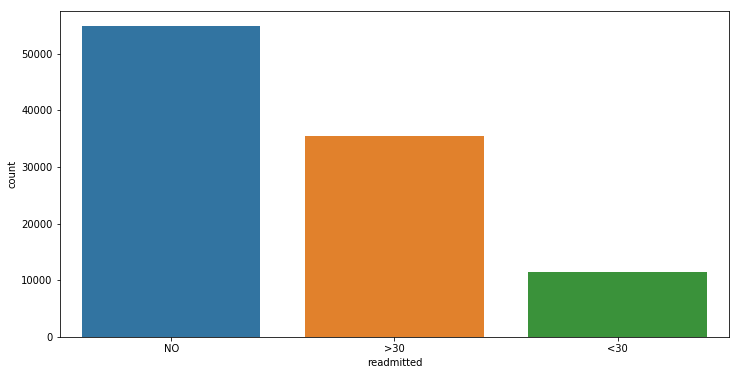

In [591]:
plt.figure(figsize=(12,6))
sns.countplot(df['readmitted'])

In [592]:
df['readmitted'].replace('>30', 'Yes', inplace= True)
df['readmitted'].replace('<30', 'Yes', inplace= True)

In [593]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,Yes
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


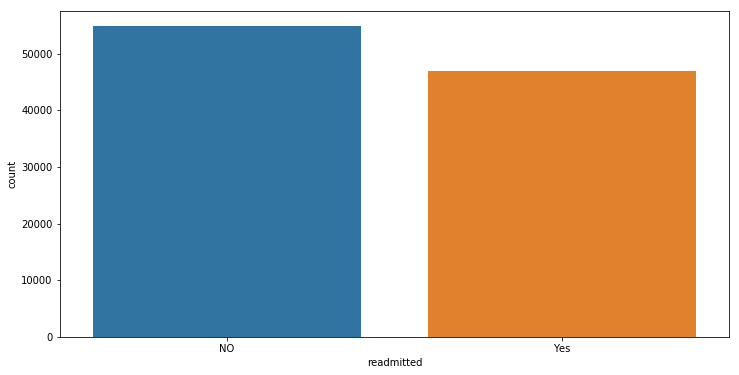

In [594]:
plt.figure(figsize=(12,6))
sns.countplot(df['readmitted'])

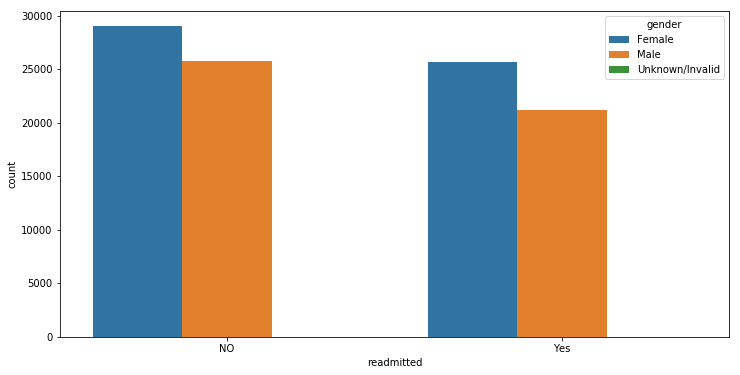

In [595]:
plt.figure(figsize=(12,6))
sns.countplot(df['readmitted'],hue=df['gender'])

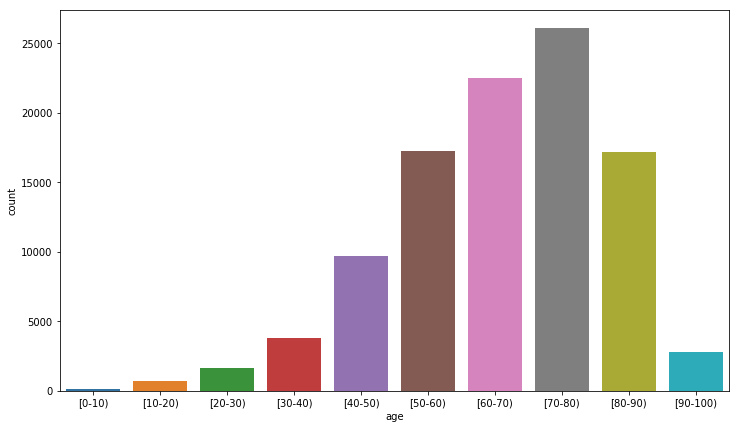

In [596]:
plt.figure(figsize = (12,7))
sns.countplot(df['age'])

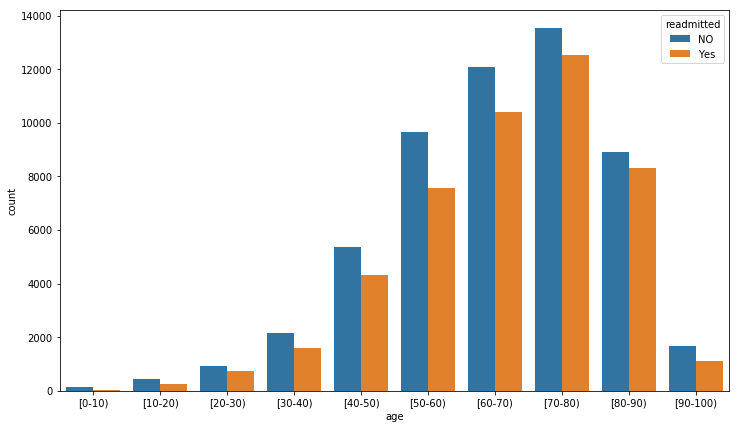

In [597]:
plt.figure(figsize = (12,7))
sns.countplot(df['age'],hue=df['readmitted'])

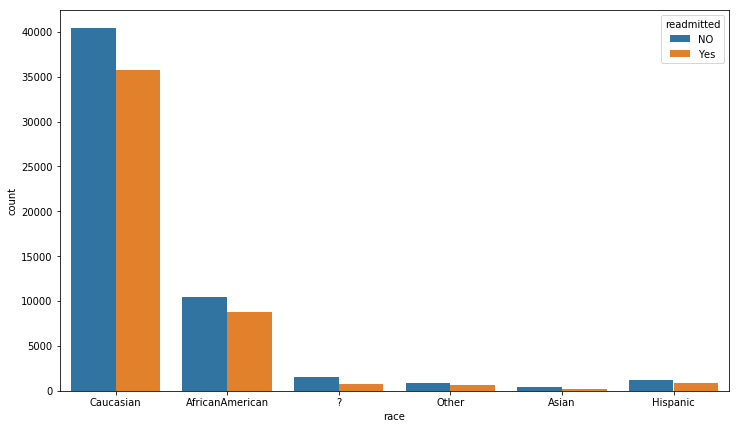

In [598]:
plt.figure(figsize = (12,7))
sns.countplot(df['race'],hue=df['readmitted'])

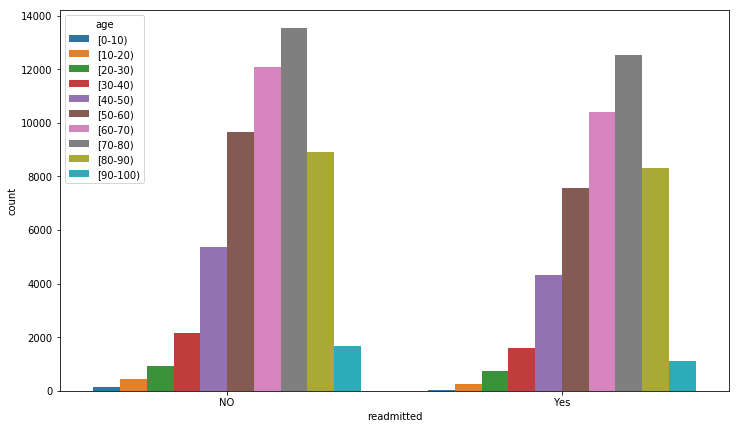

In [599]:
plt.figure(figsize = (12,7))
sns.countplot(df['readmitted'],hue=df['age'])

# Cleaning the data for ML

First we analyse the number of missing data

In [604]:
df1 = df.replace('?', np.NaN)    

null_count = df1.isnull().sum()  # Series with number of null values in a column. 

cols_with_null =  [(null_count.index[i], 100*null_count[i]/len(df1)) 
                   for i in range(len(null_count)) if null_count[i]>0 ]

In [606]:
# next we convert the list into a series
def get_Series(list):
    '''
    list: input list that needs to be converted in series
    '''
    num = []
    index = []
    for obj in list:
        num.append(obj[1])
        index.append(obj[0])
    return pd.Series(data = num, index=index)

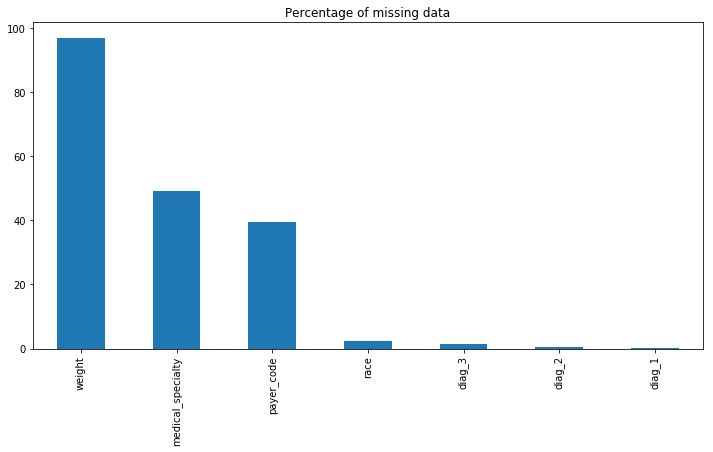

In [607]:
series_w_null = get_Series(cols_with_null)
series_w_null.sort_values(ascending = False).plot('bar', title = 'Percentage of missing data', figsize = (12,6))

Drop:
<br>
weight: because too much missing data <br>
payer_code: not relevant in this analysis <br>
medical_speciality: For now drop this column <br>

We will also drop the following columns because they are not relevant<br>
'change': not related to disease<br>
'patient_nbr' : also not related to the disease

In [609]:
df.drop(['weight', 'medical_specialty', 'payer_code', 'change', 'patient_nbr'], axis = 1, inplace=True)

In [610]:
# '?' in race will be repalced by unknown race. It 
# will in itself be considered as different category 
df['race'].replace('?','unknown',inplace = True)
df['race'].value_counts()

All row with missing data in 'diag_1', 'diag_2' and 'diag_3' will be dropped

In [612]:
df.replace('?', np.NaN, inplace= True) 
df.dropna(inplace=True)

In [613]:
df['diag_1'].isnull().value_counts()

False    100244
Name: diag_1, dtype: int64

# Chi squared test

In [614]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,Up,No,No,No,No,No,Yes,Yes
64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
500364,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,Up,No,No,No,No,No,Yes,NO
16680,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,Steady,No,No,No,No,No,Yes,NO
35754,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,No,Steady,No,No,No,No,No,Yes,Yes


In [601]:
def chi_squared(df, feature, target):
    '''
    df: data frame
    feature: feature column
    target: target
    '''
    readmitted_fraction = (df[target].value_counts()/df[target].count())['Yes']
    f_obs = df[df[target]=='Yes'][feature].value_counts()
    f_exp = df[feature].value_counts()*readmitted_fraction
    
    
    for a in df[feature].unique():
        try:
            f_obs[a] = f_obs[a]
        except KeyError:
            f_obs[a] = 0
        
    chisq = 0
    
    for a in df[feature].unique():
        chisq = chisq + (f_obs[a]-f_exp[a])**2/f_exp[a]
    return chisq

In [602]:
from scipy import stats

def p_value(df, feature, target):
    
    dof = len(df[feature].unique())-1
    chisq = chi_squared(df, feature, target)
    if dof == 0:
        return 0.0
    else:
        return (1-stats.chi2.cdf(chisq , dof))
    

In [620]:
chi_squared(df,'admission_source_id','readmitted')

561.54319101927217

In [622]:
len(df['admission_source_id'].value_counts())

17

In [633]:
plist = []
index = []
for col in df.columns[:-1]:
    pvalue = p_value(df, col, 'readmitted')
    plist.append(pvalue)
    index.append(col)

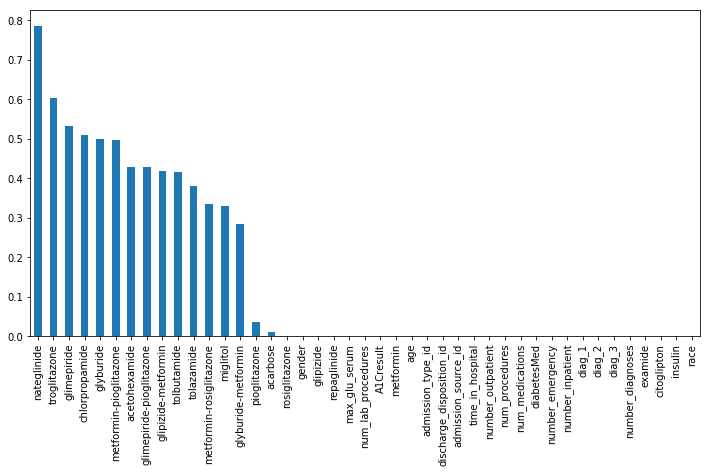

In [634]:
pd.Series(plist, index=index).sort_values(ascending = False).plot('bar',figsize = (12,6))

In [541]:
def drop_list(df):
    list = []
    columns = df.columns[:-1]
    for col in columns:
        if len(df[col].unique())<2:
            list.append(col)
        else:
            pvalue = p_value(df, col, 'readmitted')
            if pvalue > 0.05:
                list.append(col)
    return list

In [545]:
dp_list = drop_list(df)

In [546]:
dp_list

['nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glyburide',
 'tolbutamide',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [636]:
df['nateglinide'].value_counts()

No        99546
Steady      663
Up           24
Down         11
Name: nateglinide, dtype: int64

In [548]:
df.drop(dp_list, axis = 1, inplace = True)

In [550]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glipizide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'insulin', 'diabetesMed', 'readmitted'],
      dtype='object')

In [557]:
df_dummies = pd.get_dummies(df, drop_first = True)

In [566]:
df_dummies.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,insulin_No,insulin_Steady,insulin_Up,diabetesMed_Yes,readmitted_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,1,1,7,3,59,0,18,0,0,0,...,0,0,1,0,0,0,0,1,1,1
64410,1,1,7,2,11,5,13,2,0,1,...,0,0,1,0,0,1,0,0,1,0
500364,1,1,7,2,44,1,16,0,0,0,...,0,0,1,0,0,0,0,1,1,0
16680,1,1,7,1,51,0,8,0,0,0,...,0,0,1,0,0,0,1,0,1,0
35754,2,1,2,3,31,6,16,0,0,0,...,0,0,1,0,0,0,1,0,1,1


# Machine Learning

In [573]:
X=df_dummies.drop('readmitted_Yes', axis=1) #because this is our target class
y=df_dummies['readmitted_Yes']

In [574]:
from sklearn.cross_validation import train_test_split

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [576]:
from sklearn.linear_model import LogisticRegression

In [577]:
logmodel = LogisticRegression(C=0.1, solver='lbfgs')
logmodel.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [578]:
predictions = logmodel.predict(X_test)

In [579]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[12399  3749]
 [ 7669  6257]]
             precision    recall  f1-score   support

          0       0.62      0.77      0.68     16148
          1       0.63      0.45      0.52     13926

avg / total       0.62      0.62      0.61     30074

